In [7]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pickle

thermals = pickle.load(open('thermals.pickle', 'rb'))

In [11]:
center = (48.9768369291111, 8.342399668092117)

lat_start = center[0] - 1.6
lat_end = center[0] + 1.6
lon_start = center[1] - 2.4
lon_end = center[1] + 2.4

D = 1000 # Discretisation Points

alat = linspace(lat_start, lat_end, D)
alon = linspace(lon_start, lon_end, D)

aalat, aalon = meshgrid(alat, alon)

In [12]:
def lat2discrete(lat):
    return int((lat-lat_start)/(lat_end-lat_start)*D)
def lon2discrete(lon):
    return int((lon-lon_start)/(lon_end-lon_start)*D)

In [14]:
from skimage.draw import line_aa
from scipy.ndimage import rotate

img = np.zeros(aalat.shape, dtype=float)
img_N = np.zeros(aalat.shape, dtype=float)
for th in thermals:
    rr, cc, val = line_aa(lon2discrete(th[0][1]), lat2discrete(th[0][0]), lon2discrete(th[1][1]), lat2discrete(th[1][0]))
    img[rr, cc] += val * th[2]
    img_N[rr, cc] += val*1
    
img = img/img_N
img = nan_to_num(img)


img = rotate(img,90)
img_N = rotate(img_N,90)

<ipython-input-14-417059deae34>:11: RuntimeWarning: invalid value encountered in true_divide
  img = img/img_N


<IPython.core.display.Javascript object>


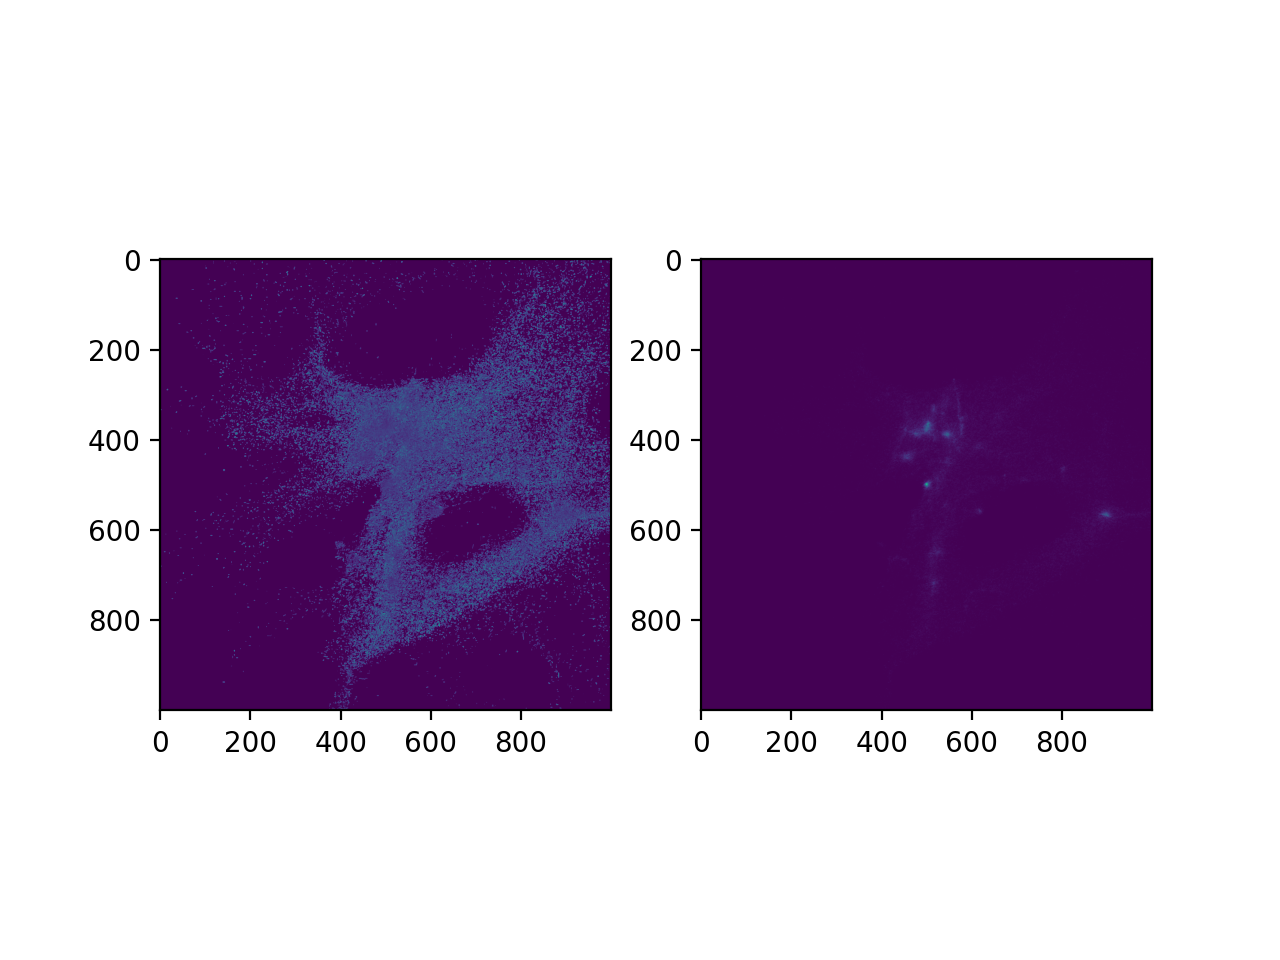

In [15]:
figure()
ax1 = subplot(121)
imshow(img)
ax2 = subplot(122, sharex=ax1, sharey=ax1)
imshow(img_N)